###Nicolás Nolivos
##Aprendizaje Automático - Actividad en Clase

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado parcticar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler,
    Normalizer, QuantileTransformer, PowerTransformer
)
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv',sep=",")


# Mostrar las primeras filas
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza una normalización de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [9]:
# Variables de interés
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target = 'price'

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(output_distribution='normal'),
    'PowerTransformer': PowerTransformer()
}

---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada conjunto.

In [10]:
print("Dimensiones de X e y para cada escalador")
print()
for name in scalers:
    X = df[features].copy()
    y = df[target].copy()
    print(f"{name} - X: {X.shape}, y: {y.shape}")


Dimensiones de X e y para cada escalador

StandardScaler - X: (21613, 5), y: (21613,)
MinMaxScaler - X: (21613, 5), y: (21613,)
MaxAbsScaler - X: (21613, 5), y: (21613,)
RobustScaler - X: (21613, 5), y: (21613,)
Normalizer - X: (21613, 5), y: (21613,)
QuantileTransformer - X: (21613, 5), y: (21613,)
PowerTransformer - X: (21613, 5), y: (21613,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [11]:

X_train_dict, X_test_dict, y_train_dict, y_test_dict = {}, {}, {}, {}

print("\n División de datos y distribución de etiquetas")

for name, scaler in scalers.items():
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_dict[name] = X_train_scaled
    X_test_dict[name] = X_test_scaled
    y_train_dict[name] = y_train
    y_test_dict[name] = y_test

    print(f"{name}:")
    print(f"  X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")



 División de datos y distribución de etiquetas
StandardScaler:
  X_train: (17290, 5), X_test: (4323, 5)
MinMaxScaler:
  X_train: (17290, 5), X_test: (4323, 5)
MaxAbsScaler:
  X_train: (17290, 5), X_test: (4323, 5)
RobustScaler:
  X_train: (17290, 5), X_test: (4323, 5)
Normalizer:
  X_train: (17290, 5), X_test: (4323, 5)
QuantileTransformer:
  X_train: (17290, 5), X_test: (4323, 5)
PowerTransformer:
  X_train: (17290, 5), X_test: (4323, 5)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


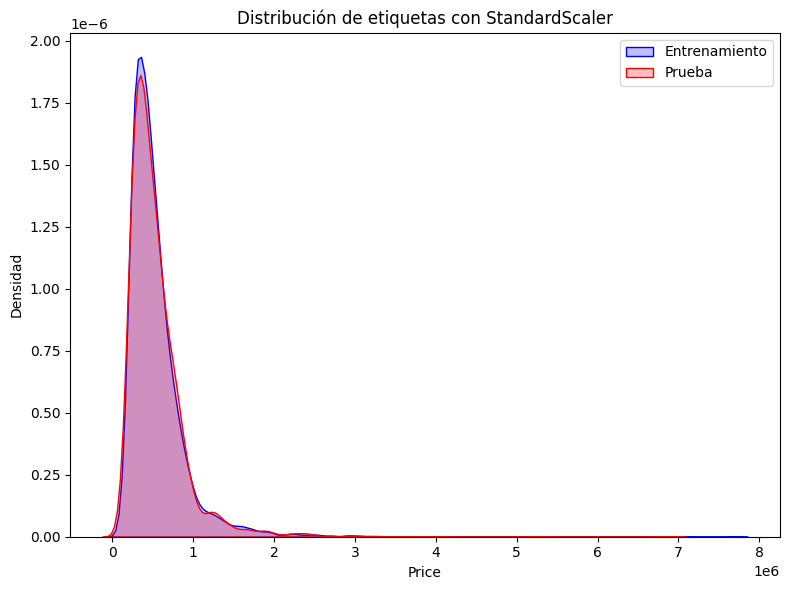

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


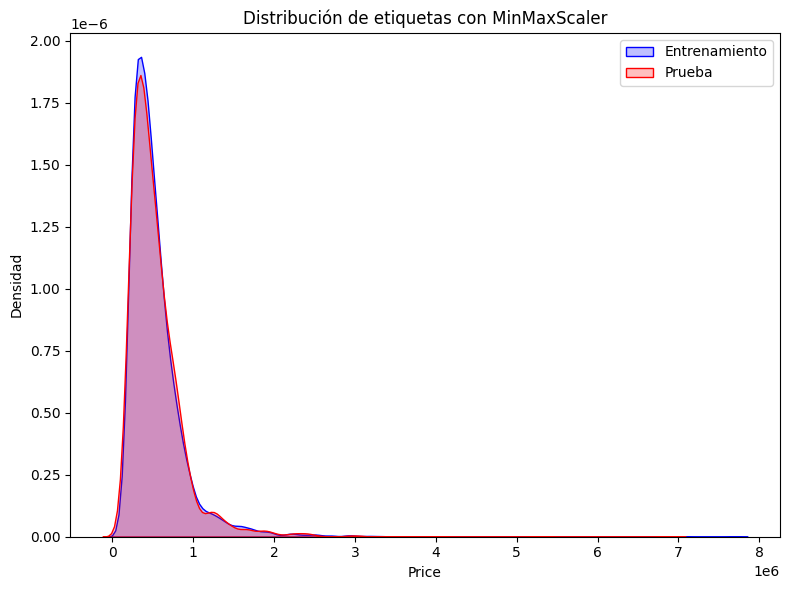

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


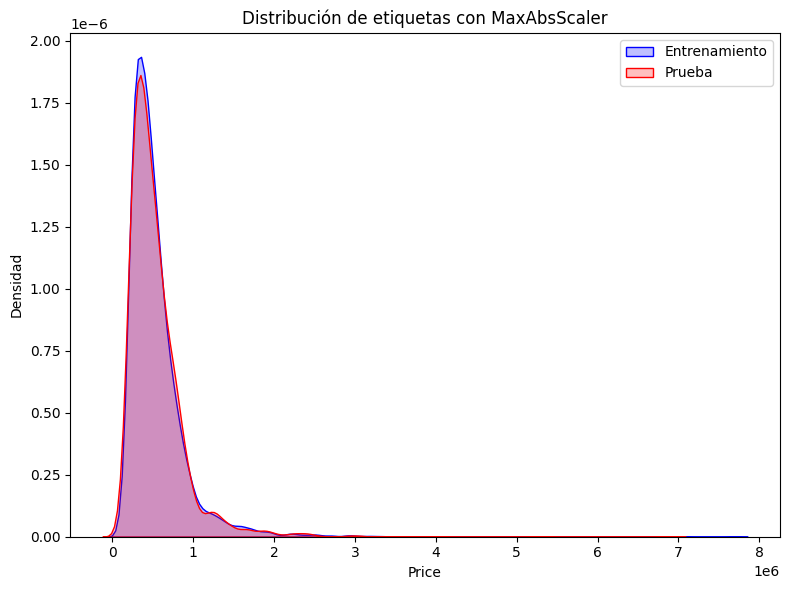

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


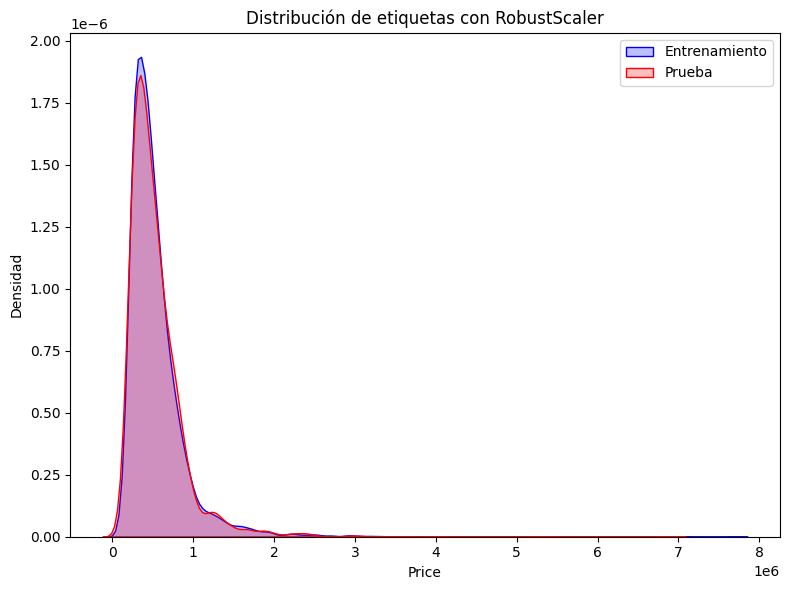

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


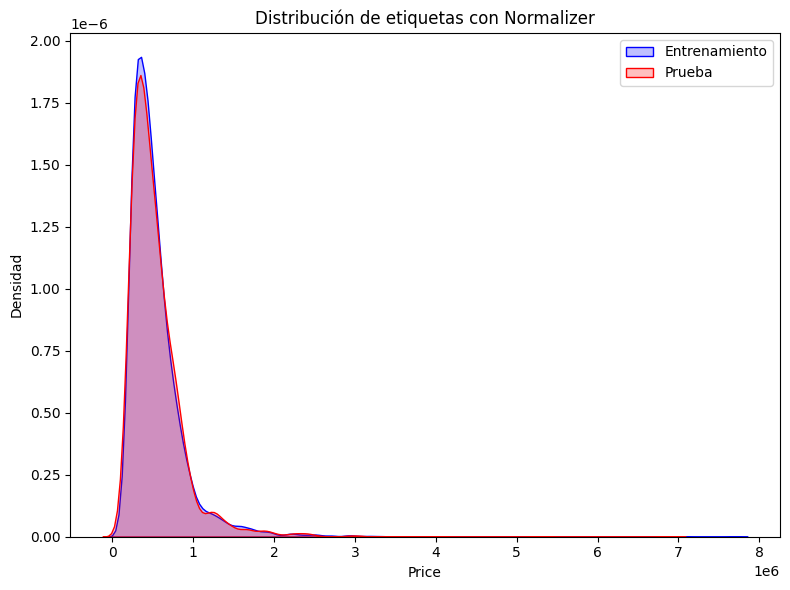

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


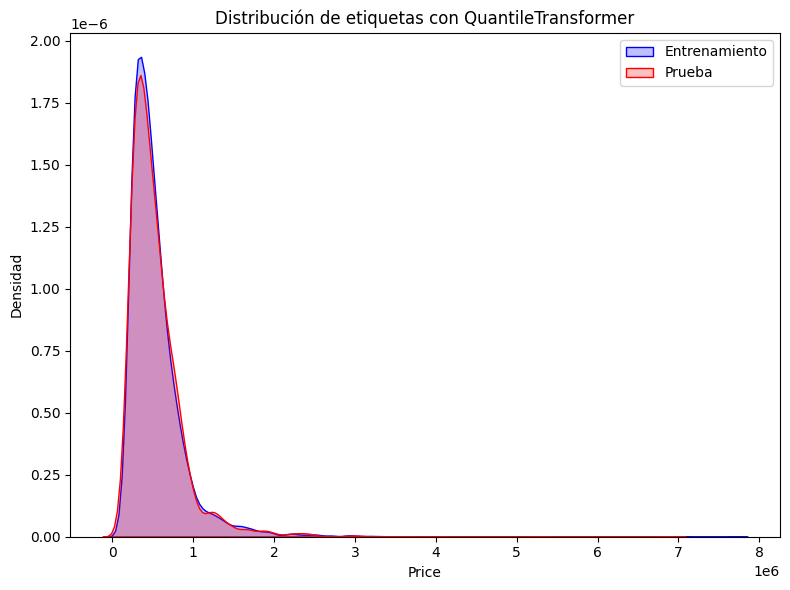

<ipython-input-12-0d13eaf63f52>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
<ipython-input-12-0d13eaf63f52>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')


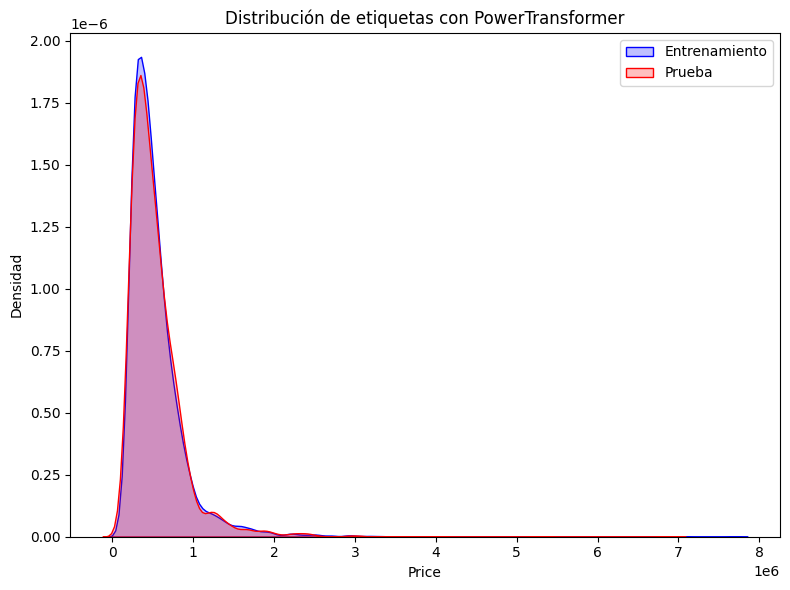

In [12]:
# Graficar la distribución de etiquetas para cada escalador
for scaler_name in y_train_dict:
    y_train_scaled = y_train_dict[scaler_name]
    y_test_scaled = y_test_dict[scaler_name]

    plt.figure(figsize=(8, 6))

    sns.kdeplot(y_train_scaled, label='Entrenamiento', shade=True, color='blue')
    sns.kdeplot(y_test_scaled, label='Prueba', shade=True, color='red')

    plt.title(f'Distribución de etiquetas con {scaler_name}')
    plt.xlabel('Price')
    plt.ylabel('Densidad')
    plt.legend()

    plt.tight_layout()
    plt.show()


---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y lo entrena con los datos de entrenamiento.

In [31]:
model_dict = {}

for scaler_name in scalers:
    print(f"\nEntrenamiento con {scaler_name}:")

    X_train_scaled = X_train_dict[scaler_name]
    y_train_scaled = y_train_dict[scaler_name]

    model = LinearRegression()

    model.fit(X_train_scaled, y_train_scaled)

    model_dict[scaler_name] = model

    print(f"Modelo entrenado con {scaler_name}")


Entrenamiento con StandardScaler:
Modelo entrenado con StandardScaler

Entrenamiento con MinMaxScaler:
Modelo entrenado con MinMaxScaler

Entrenamiento con MaxAbsScaler:
Modelo entrenado con MaxAbsScaler

Entrenamiento con RobustScaler:
Modelo entrenado con RobustScaler

Entrenamiento con Normalizer:
Modelo entrenado con Normalizer

Entrenamiento con QuantileTransformer:
Modelo entrenado con QuantileTransformer

Entrenamiento con PowerTransformer:
Modelo entrenado con PowerTransformer


---
## <font color='264CC7'> Evaluacion </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [38]:
predictions_dict = {}

for scaler_name in scalers:
    print(f"\nPredicciones con {scaler_name}:")

    X_test_scaled = X_test_dict[scaler_name]
    y_test_scaled = y_test_dict[scaler_name]

    model = model_dict[scaler_name]

    y_pred = model.predict(X_test_scaled)

    predictions_df = pd.DataFrame({
        'Actual': y_test_scaled,
        'Predicted': y_pred
    })

    predictions_dict[scaler_name] = predictions_df

    print(predictions_df.head())


Predicciones con StandardScaler:
         Actual      Predicted
18274  380000.0  731866.093801
20145  309000.0  569129.540835
1594   500000.0  420893.021155
15004  233000.0  532395.593994
16285  565000.0  883330.633962

Predicciones con MinMaxScaler:
         Actual      Predicted
18274  380000.0  731866.093801
20145  309000.0  569129.540835
1594   500000.0  420893.021155
15004  233000.0  532395.593994
16285  565000.0  883330.633962

Predicciones con MaxAbsScaler:
         Actual      Predicted
18274  380000.0  731866.093801
20145  309000.0  569129.540835
1594   500000.0  420893.021155
15004  233000.0  532395.593994
16285  565000.0  883330.633962

Predicciones con RobustScaler:
         Actual      Predicted
18274  380000.0  731866.093801
20145  309000.0  569129.540835
1594   500000.0  420893.021155
15004  233000.0  532395.593994
16285  565000.0  883330.633962

Predicciones con Normalizer:
         Actual      Predicted
18274  380000.0  725526.060372
20145  309000.0  523360.745479
159

Calcula el error cuadrático medio.

In [34]:
mse_dict = {}

# Evaluación para cada escalador
for scaler_name in scalers:
    print(f"\nEvaluación con {scaler_name}:")

    X_test_scaled = X_test_dict[scaler_name]
    y_test_scaled = y_test_dict[scaler_name]

    model = model_dict[scaler_name]

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test_scaled, y_pred)

    mse_dict[scaler_name] = mse

    print(f"Error cuadrático medio (MSE) con {scaler_name}: {mse:.4f}")


Evaluación con StandardScaler:
Error cuadrático medio (MSE) con StandardScaler: 66046463199.9877

Evaluación con MinMaxScaler:
Error cuadrático medio (MSE) con MinMaxScaler: 66046463199.9877

Evaluación con MaxAbsScaler:
Error cuadrático medio (MSE) con MaxAbsScaler: 66046463199.9877

Evaluación con RobustScaler:
Error cuadrático medio (MSE) con RobustScaler: 66046463199.9877

Evaluación con Normalizer:
Error cuadrático medio (MSE) con Normalizer: 109151455296.1541

Evaluación con QuantileTransformer:
Error cuadrático medio (MSE) con QuantileTransformer: 79568215594.2885

Evaluación con PowerTransformer:
Error cuadrático medio (MSE) con PowerTransformer: 80753750716.0689


Escribe el error cuadrático medio para cada tipo de normalización:

- Normalización MaxAbsScaler:
- Normalización MinMaxScaler:
- Normalización RobustScaler:
- Normalización StandardScaler:
- Normalización Normalizer:
- Normalización QuantileTransformer:
- Normalización PowerTransformer:

Escribe un párrafo sobre qué hace normalización no vista en clase:


- **La Normalización MaxAbsScaler** es un método de normalización que escala las características dividiendo cada valor por el valor absoluto máximo en esa característica. Este escalador no cambia la distribución de los datos, pero asegura que los valores estén en el rango de [-1, 1] sin afectar las características con diferentes unidades de medida.


- **La Normalización RobustScaler** utiliza la mediana y el rango intercuartílico (IQR) para escalar las características, en lugar de la media y la desviación estándar. Este escalador es robusto frente a los valores atípicos, ya que no es tan sensible a ellos, haciendo que funcione bien en distribuciones no normales y datos con outliers.

- **La Normalización Normalizer** escala cada observación (fila) de manera que su norma (longitud) sea igual a 1. A diferencia de otros métodos que normalizan por características, el Normalizer ajusta cada muestra independientemente, lo que es útil cuando las características no son de la misma escala y se quiere mantener su proporción relativa.

- **La Normalización QuantileTransformer** transforma las características para que sigan una distribución uniforme o normal. Esto se logra utilizando los cuantiles de las características para hacer que los datos se ajusten a una distribución deseada. Es útil para modelos que asumen que los datos siguen una distribución normal.

- **La Normalización PowerTransformer** aplica transformaciones como la raíz cuadrada, logaritmo o Box-Cox para estabilizar la varianza y hacer que los datos se acerquen a una distribución normal. Este escalador es útil cuando los datos tienen una distribución sesgada o asimétrica y se busca una mejora en los resultados del modelo.


### ¿Por qué el error cuadrático medio (MSE) es el mismo para algunos escaladores?

El motivo por el que el error cuadrático medio (MSE) es el mismo para algunos escaladores, como **StandardScaler**, **MinMaxScaler**, **MaxAbsScaler**, y **RobustScaler**, es que estos métodos no modifican demasiado la relación entre las variables en los datos. Es decir, no tienen un impacto tan grande en el modelo de regresión lineal, lo que resulta en un MSE igual. Aunque estos escaladores aplican diferentes transformaciones, sus efectos no son tan evidentes para este tipo de modelo.

Sin embargo, cuando usamos escaladores como **Normalizer**, **QuantileTransformer** y **PowerTransformer**, los resultados cambian más, y por eso obtenemos un MSE diferente. Estos métodos hacen transformaciones más complejas:

- **Normalizer** ajusta los datos para que cada observación tenga una longitud unitaria (es decir, se normaliza todo para que el valor total sea 1). Esto puede alterar la distribución de los datos y, por lo tanto, afectar cómo el modelo de regresión los usa.
  
- **QuantileTransformer** y **PowerTransformer** buscan transformar los datos para que se ajusten a una distribución específica, como la distribución normal. Este tipo de transformación cambia la relación entre las variables de una forma más drástica, lo que genera un MSE diferente en comparación con los otros escaladores más simples.

Algunos escaladores no afectan demasiado los datos y dan resultados similares en cuanto al MSE, mientras que otros, debido a sus transformaciones más complejas, cambian más las relaciones entre las variables y el desempeño del modelo.


---
## <font color='264CC7'> Cross Validation </font>

Realiza validación cruzada con 5 particiones y muestra el error cuadrático medio promedio con la normalización que mejor se ajuste a los datos para confirmar que el modelo no está sobreajustado.

In [35]:
scaler = StandardScaler()

# Escalar los datos (usando todo el conjunto de datos, no solo el entrenamiento)
X_scaled = scaler.fit_transform(X)
y_scaled = y

model = LinearRegression()

# Realizar validación cruzada con 5 particiones
cv_scores = cross_val_score(model, X_scaled, y_scaled, cv=5, scoring='neg_mean_squared_error')

mse_avg = np.mean(-cv_scores)

print(f"Error cuadrático medio promedio (MSE) con StandardScaler (validación cruzada): {mse_avg:.4f}")

Error cuadrático medio promedio (MSE) con StandardScaler (validación cruzada): 66421052686.5472
